# Making a new hybrid grid file

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

## Open existing hycom1 file and vcoord file

In [2]:
ds_hycom = xr.open_dataset("/g/data/x77/ahg157/inputs/mom6/panan/hycom1_75_800m.nc")
ds_vcoord = xr.open_dataset("/g/data/x77/ahg157/inputs/mom6/panan/vcoord.nc")

In [19]:
dz_KDS75 = np.diff(ds_vcoord.st_edges_ocean.values)

In [24]:
## FNC1 code:
dz_min = 1.082
h_total=4000
power = 4.5
nk = 75

dz=np.zeros(nk)

for k in range(nk):
    dz[k] = ((k)/(nk))**power
    
dz = ( h_total - (nk) * dz_min ) * ( dz / np.sum(dz) ) #! Rescale to so total is H_total
dz[-1] = dz[-1] + ( h_total - np.sum( dz + dz_min ) ) #! Adjust bottommost layer
dz = dz + dz_min #! Finally add in the constant dz_min

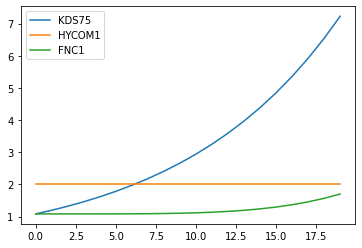

In [25]:
plt.plot(dz_KDS75[:20],label='KDS75')
plt.plot(ds_hycom.dz[:20],label='HYCOM1')
plt.plot(dz[:20],label='FNC1')
plt.legend()

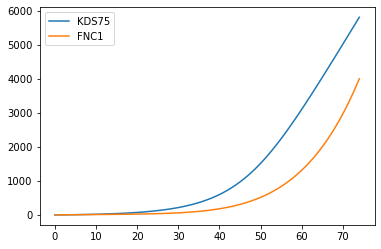

In [27]:
plt.plot(np.cumsum(dz_KDS75),label='KDS75')
#plt.plot(np.cumsum(ds_hycom.dz),label='HYCOM1')
plt.plot(np.cumsum(dz),label='FNC1')
plt.legend()

In [10]:
ds_hycom['dz'].values = dz
#ds_hycom.to_netcdf('/g/data/x77/amh157/hycom1_kds75.nc')
ds_hycom.to_netcdf('/g/data/x77/ahg157/inputs/mom6/panan/hycom1_kds75.nc')

In [28]:
dz

array([  1.082     ,   1.08200109,   1.08202463,   1.08215268,
         1.0825572 ,   1.08352092,   1.0854548 ,   1.08891327,
         1.09460804,   1.10342071,   1.11641458,   1.13484569,
         1.16017324,   1.19406955,   1.23842951,   1.29537975,
         1.36728731,   1.45676815,   1.56669529,   1.70020673,
         1.86071315,   2.05190535,   2.27776157,   2.54255457,
         2.85085859,   3.20755607,   3.61784435,   4.08724211,
         4.62159577,   5.22708573,   5.91023248,   6.67790263,
         7.53731485,   8.49604566,   9.56203517,  10.74359272,
        12.04940245,  13.48852871,  15.07042155,  16.80492194,
        18.70226711,  20.77309565,  23.0284527 ,  25.47979494,
        28.13899559,  31.01834937,  34.13057736,  37.4888318 ,
        41.10670087,  44.9982134 ,  49.17784355,  53.66051538,
        58.46160748,  63.59695744,  69.08286636,  74.93610327,
        81.17390954,  87.8140032 ,  94.8745833 , 102.37433416,
       110.33242959, 118.76853715, 127.70282224, 137.15